In [5]:
!conda install -y dask distributed 

^C


In [9]:
from dask.distributed import Client, LocalCluster

In [35]:
cluster.close()

: 

In [29]:
cluster = LocalCluster(threads_per_worker=3,
                n_workers=3, memory_limit='4GB')


In [30]:

client = cluster.get_client()


In [31]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 3
Total threads: 9,Total memory: 11.18 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:61351,Workers: 3
Dashboard: http://127.0.0.1:8787/status,Total threads: 9
Started: Just now,Total memory: 11.18 GiB
Comm: tcp://127.0.0.1:61362,Total threads: 3
Dashboard: http://127.0.0.1:61365/status,Memory: 3.73 GiB
Nanny: tcp://127.0.0.1:61354,


In [ ]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [ ]:
X, y = make_classification(n_samples=10000, random_state=0)
X[:5]

array([[ 0.83035958, -0.33025241, -0.23054277, -0.46191112,  0.42304301,
         1.19815019, -0.59851063,  0.56008387,  1.17255537,  0.45665398,
        -0.08517492,  0.12084453, -0.51434822,  0.02847425,  1.43269973,
        -0.6677283 ,  0.30813234, -1.02979077,  1.73386698, -0.59929727],
       [-0.04399859,  0.22065793,  1.60051901,  0.11692888,  0.39006388,
        -1.4210959 , -0.63397821, -0.18446167,  1.01548964,  1.94136332,
         0.27352682,  1.76263002,  1.38009357, -0.9205535 ,  0.20944082,
        -0.56410585,  0.01261085, -1.10753423,  2.00591217, -0.56636377],
       [ 0.62671752,  2.10042501, -0.96579802, -0.12887373,  0.4792396 ,
         2.15869188, -0.66002344,  0.10919581,  0.61912878, -0.31666808,
         0.80964227, -0.44948643, -1.01452623,  1.22213699, -0.81755161,
         0.69195336, -1.26481107, -1.03976259,  0.94128447, -1.05338458],
       [ 0.61823591, -2.05020364,  0.19723123, -1.34939051,  0.78762161,
        -2.37255435, -0.45377169, -0.30712504,  

In [ ]:
param_grid = {"C": [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
              "kernel": ['rbf', 'poly', 'sigmoid'],
              "shrinking": [True, False]}

grid_search = GridSearchCV(SVC(gamma='auto', random_state=0, probability=True),
                           param_grid=param_grid,
                           return_train_score=False,
                           cv=3,
                           n_jobs=-1)

In [ ]:
# Fit normaly with
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=SVC(gamma='auto', probability=True, random_state=0),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
                         'kernel': ['rbf', 'poly', 'sigmoid'],
                         'shrinking': [True, False]})

In [ ]:
# fit with cluster
import joblib

with joblib.parallel_backend('dask'):
    grid_search.fit(X, y)

2024-03-08 11:58:31,554 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.36 GiB -- Worker memory limit: 1.86 GiB
2024-03-08 11:59:20,151 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.30 GiB -- Worker memory limit: 1.86 GiB
2024-03-08 11:59:40,245 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- U

In [ ]:
!pip install dask-ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 1.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00


In [ ]:
from sklearn.datasets import make_classification, make_blobs
from sklearn.cluster import KMeans

In [ ]:
X, y = make_blobs(n_samples=100_000_000,
                  random_state=0,
                  centers=3)

In [ ]:
km = KMeans(n_clusters=3)
km.fit(X)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


: 

In [19]:
import dask_ml.datasets
import dask_ml.cluster
import matplotlib.pyplot as plt

In [33]:
X, y = dask_ml.datasets.make_blobs(n_samples=300_000_000,
                                   chunks=1_000_000,
                                   random_state=0,
                                   centers=3)
X = X.persist()
X

dask.array<concatenate, shape=(300000000, 2), dtype=float64, chunksize=(1000000, 2), chunktype=numpy.ndarray>

In [34]:
km = dask_ml.cluster.KMeans(n_clusters=3, init_max_iter=2, oversampling_factor=10)
km.fit(X)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/dask/base.py:1462: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


KMeans(init_max_iter=2, n_clusters=3, oversampling_factor=10)

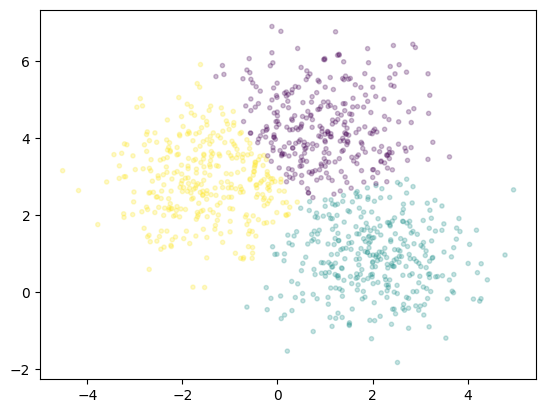

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X[::10000, 0], X[::10000, 1], marker='.', c=km.labels_[::10000],
           cmap='viridis', alpha=0.25);